# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.088229e+01     7.965769e+00
 * time: 0.005414009094238281
     1     2.832619e+01     4.859906e+00
 * time: 0.016282081604003906
     2     2.144510e+01     5.235009e+00
 * time: 0.041483163833618164
     3     1.454486e+01     1.751755e+00
 * time: 0.07108712196350098
     4     1.434296e+01     3.208350e+00
 * time: 0.09086799621582031
     5     1.283892e+01     2.093256e+00
 * time: 0.11073708534240723
     6     1.034170e+01     1.163507e+00
 * time: 0.13599610328674316
     7     9.868044e+00     7.755896e-01
 * time: 0.15615200996398926
     8     9.634615e+00     7.567013e-01
 * time: 0.17591309547424316
     9     9.512787e+00     4.569524e-01
 * time: 0.19579410552978516
    10     9.475556e+00     1.494394e+00
 * time: 0.21088600158691406
    11     9.369105e+00     7.913511e-01
 * time: 0.22637701034545898
    12     9.307503e+00     5.901641e-01
 * time: 0.24129700660705566
    13     9.270451e+00     4.846960e-01
 * ti

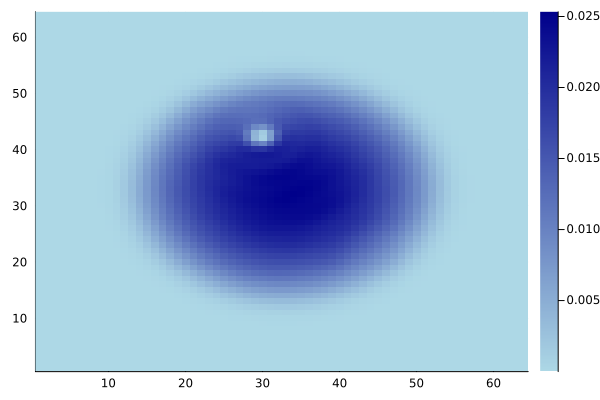

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)